Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       247
           1       0.37      0.60      0.46        47

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.78      0.79       294

Random Forest Results:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       247
           1       0.43      0.21      0.29        47

    accuracy                           0.83       294
   macro avg       0.65      0.58      0.59       294
weighted avg       0.79      0.83      0.80       294

XGBoost Results:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weigh

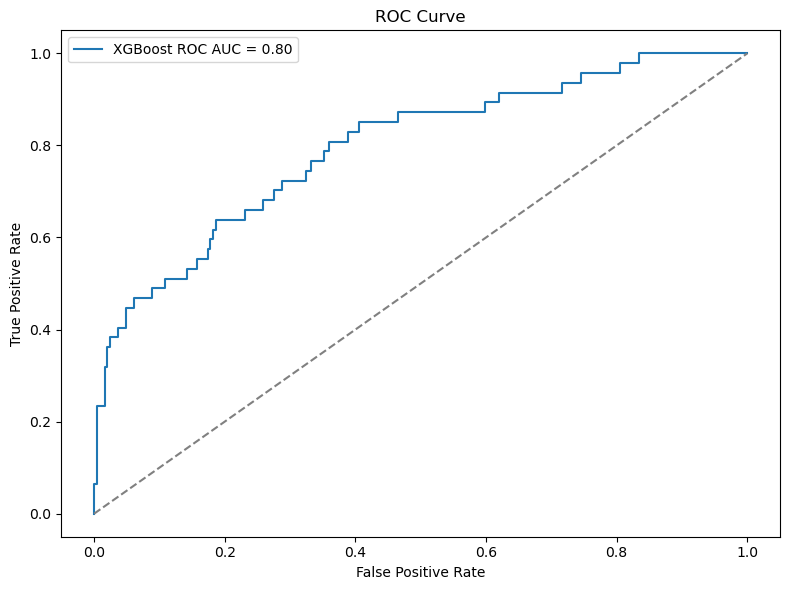

In [8]:
# Notebook #2: Feature Engineering & Modeling

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load clean data
df = pd.read_csv("/Users/shauryadityasingh/Downloads/HR Analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Binary encoding of target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# One-hot encoding of categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Model training: Logistic Regression
log_clf = LogisticRegression()
log_clf.fit(X_train_res, y_train_res)
y_pred_log = log_clf.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

# Model training: Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Model training: XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_clf.predict(X_test_scaled)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

# ROC Curve for best model
y_pred_proba = xgb_clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost ROC AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()